In [1]:
import matplotlib.pyplot as plt
import Cell_BLAST as cb
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4

In [2]:
dataset = cb.data.ExprDataSet.read_dataset(
    "../../Datasets/data/Baron_human+Muraro+Enge+Segerstolpe+Xin_2016+Lawlor/data.h5"
).normalize()

In [3]:
tsne = cb.data.read_hybrid_path(
    "../../Results/Cell_BLAST/Baron_human+Muraro+Enge+Segerstolpe+Xin_2016+Lawlor/"
    "seurat_genes/dim_10_rmbatch_0.01/trial_1/result.h5//tSNE/latent"
)
dataset.obs["tSNE1"] = tsne[:, 0]
dataset.obs["tSNE2"] = tsne[:, 1]

[  Info   ] Using cached tSNE...
[  Info   ] Using cached tSNE...


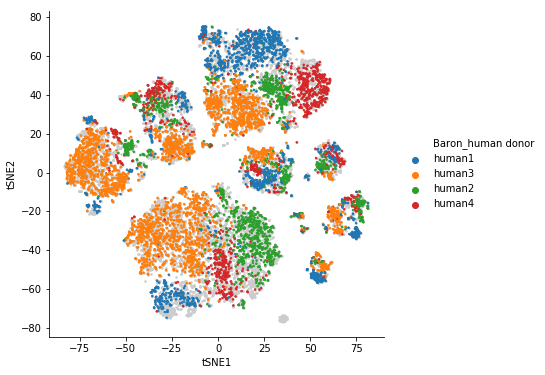

In [4]:
dataset.obs.loc[
    dataset.obs["dataset_name"] == "Baron_human", "Baron_human donor"
] = dataset.obs["donor"]
_, ax = plt.subplots(figsize=(6, 6))
ax = dataset.visualize_latent(ax=ax, scatter_kws=dict(color="#CCCCCC"))
ax = dataset.visualize_latent("Baron_human donor", ax=ax)
ax.get_figure().savefig("./multiple_bias_simple_vis_baron_human.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...
[  Info   ] Using cached tSNE...


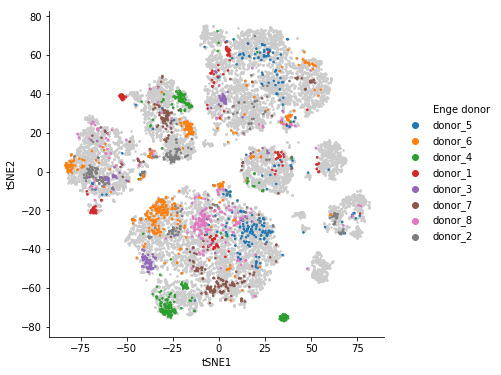

In [5]:
dataset.obs.loc[
    dataset.obs["dataset_name"] == "Enge", "Enge donor"
] = dataset.obs["donor"]
_, ax = plt.subplots(figsize=(6, 6))
ax = dataset.visualize_latent(ax=ax, scatter_kws=dict(color="#CCCCCC"))
ax = dataset.visualize_latent("Enge donor", ax=ax)
ax.get_figure().savefig("./multiple_bias_simple_vis_Enge.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...
[  Info   ] Using cached tSNE...


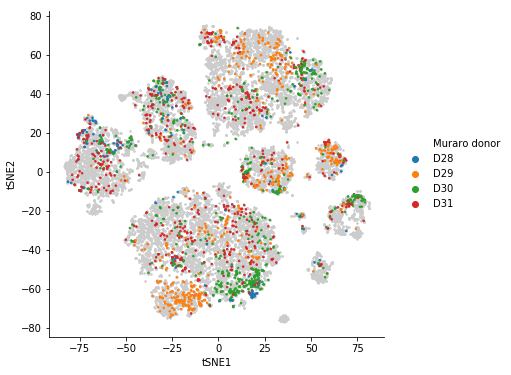

In [6]:
dataset.obs.loc[
    dataset.obs["dataset_name"] == "Muraro", "Muraro donor"
] = dataset.obs["donor"]
_, ax = plt.subplots(figsize=(6, 6))
ax = dataset.visualize_latent(ax=ax, scatter_kws=dict(color="#CCCCCC"))
ax = dataset.visualize_latent("Muraro donor", ax=ax)
ax.get_figure().savefig("./multiple_bias_simple_vis_Muraro.pdf", bbox_inches="tight")

In [7]:
model = cb.directi.fit_DIRECTi(
    dataset, dataset.uns["seurat_genes"],
    latent_dim=10, cat_dim=20, batch_effect=[
        "dataset_name", "Baron_human donor", "Enge donor", "Muraro donor"
    ], rmbatch_module_kwargs=dict(lambda_reg=0.005),
    epoch=200, patience=30, path="/tmp/cb/multiple_bias"
)

[DIRECTi epoch 0] train=1.707, val=1.697, time elapsed=4.1s Regular save...
[DIRECTi epoch 1] train=1.258, val=0.876, time elapsed=2.7s
[DIRECTi epoch 2] train=0.708, val=0.711, time elapsed=2.7s
[DIRECTi epoch 3] train=0.687, val=0.676, time elapsed=2.7s
[DIRECTi epoch 4] train=0.662, val=0.677, time elapsed=2.6s
[DIRECTi epoch 5] train=0.646, val=0.651, time elapsed=2.5s
[DIRECTi epoch 6] train=0.638, val=0.644, time elapsed=2.6s
[DIRECTi epoch 7] train=0.631, val=0.631, time elapsed=2.6s
[DIRECTi epoch 8] train=0.623, val=0.621, time elapsed=2.6s
[DIRECTi epoch 9] train=0.614, val=0.611, time elapsed=2.5s
[DIRECTi epoch 10] train=0.606, val=0.605, time elapsed=2.6s Regular save...
[DIRECTi epoch 11] train=0.601, val=0.605, time elapsed=2.6s
[DIRECTi epoch 12] train=0.598, val=0.600, time elapsed=2.6s
[DIRECTi epoch 13] train=0.595, val=0.597, time elapsed=2.6s
[DIRECTi epoch 14] train=0.592, val=0.594, time elapsed=2.5s
[DIRECTi epoch 15] train=0.591, val=0.591, time elapsed=2.5s
[D

In [8]:
dataset.latent = model.inference(dataset)

[  Info   ] Using cached tSNE...


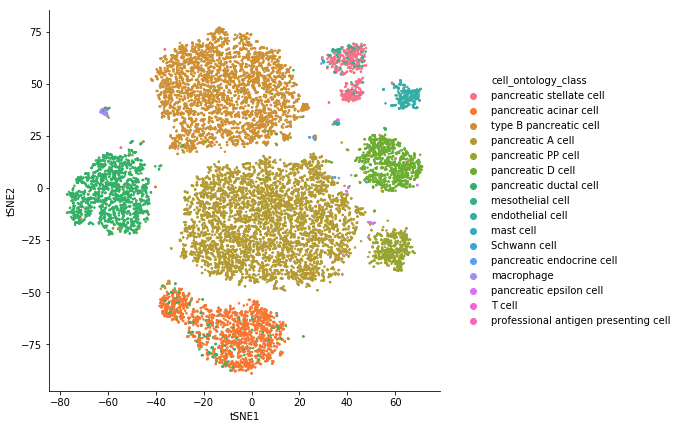

In [14]:
ax = dataset.visualize_latent("cell_ontology_class")
ax.get_figure().savefig("./multiple_bias_complex_vis_cl.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


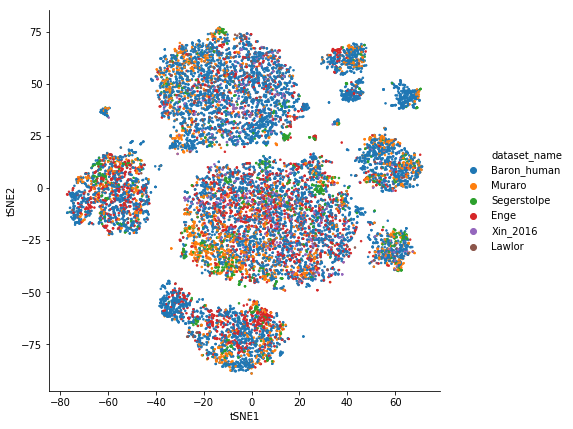

In [15]:
ax = dataset.visualize_latent("dataset_name")
ax.get_figure().savefig("./multiple_bias_complex_vis_batch.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...
[  Info   ] Using cached tSNE...


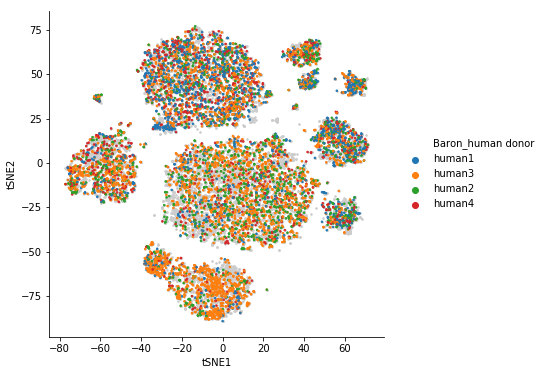

In [11]:
dataset.obs.loc[
    dataset.obs["dataset_name"] == "Baron_human", "Baron_human donor"
] = dataset.obs["donor"]
_, ax = plt.subplots(figsize=(6, 6))
ax = dataset.visualize_latent(ax=ax, scatter_kws=dict(color="#CCCCCC"))
ax = dataset.visualize_latent("Baron_human donor", ax=ax)
ax.get_figure().savefig("./multiple_bias_complex_vis_baron_human.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...
[  Info   ] Using cached tSNE...


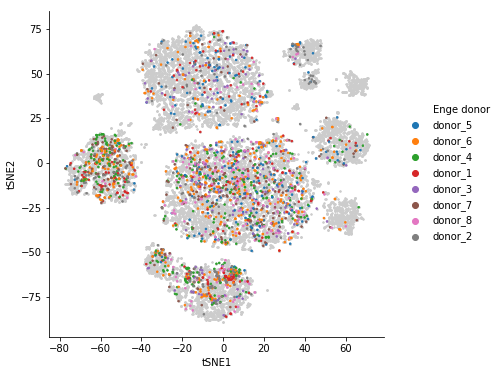

In [12]:
dataset.obs.loc[
    dataset.obs["dataset_name"] == "Enge", "Enge donor"
] = dataset.obs["donor"]
_, ax = plt.subplots(figsize=(6, 6))
ax = dataset.visualize_latent(ax=ax, scatter_kws=dict(color="#CCCCCC"))
ax = dataset.visualize_latent("Enge donor", ax=ax)
ax.get_figure().savefig("./multiple_bias_complex_vis_Enge.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...
[  Info   ] Using cached tSNE...


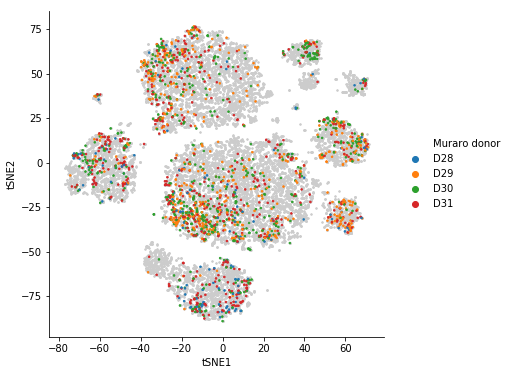

In [13]:
dataset.obs.loc[
    dataset.obs["dataset_name"] == "Muraro", "Muraro donor"
] = dataset.obs["donor"]
_, ax = plt.subplots(figsize=(6, 6))
ax = dataset.visualize_latent(ax=ax, scatter_kws=dict(color="#CCCCCC"))
ax = dataset.visualize_latent("Muraro donor", ax=ax)
ax.get_figure().savefig("./multiple_bias_complex_vis_Muraro.pdf", bbox_inches="tight")